Final Project Submission
Please fill out:

* Student name: Brycen Wong
* Student pace: Self Paced
* Scheduled project review date/time: Sometime in May
* Instructor name: Eli


### Data Science with the OSEMN Approach

When working on a data science projects, it is beneficial to break it down into smaller manageable pieces and complete them one-by-one. There are many work flow models. This project will use OSEMN: It defines data science according to the following five steps:

1 - Obtaining the data
2 - Scrubbing the data
3 - Exploring the data
4 - Modeling the data 
5 - iNterpreting the results


Although the five steps are presented in a linear and incremental fashion, in practice it is standard to move back and forth between steps or to perform multiple steps at the same time. Data science is an iterative and non-linear process. For example, once you have modeled your data, and you look at the results, you may decide to go back to the scrubbing step to adjust the features of the data set.


### 1- Obtaining the Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

#https://pypi.org/project/stargazer/
from stargazer.stargazer import Stargazer 

#https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output
from IPython.core.display import display, HTML 


In [2]:
# read data into a DataFrame and check first 10 rows
df = pd.read_csv('kc_house_data.txt')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
# check the shape and get a concise summary of the data
print('*** Shape ***')
print(df.shape)
print('\n*** Summary Metadata ***')
print(df.info())

*** Shape ***
(21597, 21)

*** Summary Metadata ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int

In [4]:
# optional preemptive modeling on unprocessed data

# let's see how this data looks without any processing

# Set exogenous (y) variable with no log transform
endogenous_variable = df.price

# Model 1: price = bedroom + const
model1_exogenous_variables = ["bedrooms"]
model1 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model1_exogenous_variables])).fit()

# Model 2: price = bathroom + const
model2_exogenous_variables = ["bathrooms"]
model2 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model2_exogenous_variables])).fit()

# Model 3: price = bedroom + bathroom + const
model3_exogenous_variables = ['bedrooms', 'bathrooms']
model3 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model3_exogenous_variables])).fit()

# Model 4: ...
model4_exogenous_variables = ['sqft_living', 'sqft_lot']
model4 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model4_exogenous_variables])).fit()

# Model 5: ...
model5_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' ]
model5 = sm.OLS(endog=endogenous_variable, exog=sm.add_constant(df[model5_exogenous_variables])).fit()

# Create Table 1
table1 = Stargazer([model1, model2, model3, model4, model5])
table1_html = HTML(table1.render_html())

# Display Table 
display(table1_html)

/Users/brycenwong/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Looking at a model:
1. (Dataset)
2. Model Variables Chosen
3. Significance of Variables
4. Explanatory Power of the Model (R^2)

#### Comparing Two Models:
5. Describe the difference of 1 between the two
5. Describe the difference of 2 between the two
5. Describe the difference of 3 between the two
5. Describe the difference of 4 between the two


In [5]:
# Set exogenous (y) variable
endogenous_variable = ['price']

# All (Yes/No) Waterfront
df_all = df
df_all.waterfront = df_all.waterfront.astype('float64')

# Subset by Yes Waterfront
dfyw = df[df.waterfront == 1]

# Subset by No Waterfront
dfnw = df[df.waterfront == 0]



# Model 6: price = bedrooms + bathrooms + sqft_living + sqft_lot + const
# Sample: Only Yes Waterfront Properties
model6_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' ]
model6 = sm.OLS(endog=dfyw[endogenous_variable], exog=sm.add_constant(dfyw[model6_exogenous_variables])).fit()

# # Model 7: price = bedrooms + bathrooms + sqft_living + sqft_lot + const
# # Sample: Everyone
# model7_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront']
# model7 = sm.OLS(endog=df_all[endogenous_variable], exog=sm.add_constant(df_all[model7_exogenous_variables])).fit()

# Model 8: price = bedrooms + bathrooms + sqft_living + sqft_lot + const
# Sample: Only No Waterfront Properties
model8_exogenous_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' ]
model8 = sm.OLS(endog=dfnw[endogenous_variable], exog=sm.add_constant(dfnw[model8_exogenous_variables])).fit()



# Create Table 2
table2 = Stargazer([model6, model8])
table2_html = HTML(table2.render_html())

# Display Table  2
display(table2_html)

In [6]:
# *** = p value <.01


# So without any processing we were able to obtain these models 

### Summary of Step 1

There are 21,597 records and 21 columns.
The target variable we are going to predict is the price. 

The other variables are features that affect the target. Some are unecessary for our analysis.
There are columns with null values (e.g. waterfront) or wrong datatypes (e.g. sqft_basement).


### Step 2 - Scrubbing the data
* 2.1 - Subsampling 
* 2.2 - Dealing with datatypes 
* 2.3 - Dealing with null values 
* 2.4 - Checking for multicollinearity 
* 2.5 - Remove unnecessary columns

### 2.1 - Subsampling

In [7]:
# no need to subsample as dataset is not that large


### 2.2 - Dealing with datatypes


In [8]:
# check all datatypes first
print('\n*** Data Types ***\n')
print(df.dtypes)


*** Data Types ***

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [9]:
# these datatypes should be categorical

df.waterfront = df.waterfront.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.view = df.view.astype('category')

In [10]:
# As we saw in the head, the sqft_basement has '?' values we have to deal with.

len(df.query("sqft_basement == '?'"))
# there are 454 of these questionmarks set as values


454

In [11]:
# convert the '?' in '0' as we believe it is a placeholder for having no basement.
df.sqft_basement.replace(['?'], '0', inplace=True)

# then cast it to an float and to an int-datatype
df.sqft_basement = df.sqft_basement.astype('float').astype('int')

# check datatype and unique values
print('*** Datatype ***: ', df.sqft_basement.dtype)
print('\n*** Unique Values ***')
print(df.sqft_basement.unique())

*** Datatype ***:  int64

*** Unique Values ***
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2600 1690  243 121

### 2.3 - Dealing with NA values

In [12]:
print(df.isna().sum())


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [13]:
# we are trying to view valid entries of these variables and the distribution
df['view'].unique()

[0.0, NaN, 3.0, 4.0, 2.0, 1.0]
Categories (5, float64): [0.0, 3.0, 4.0, 2.0, 1.0]

In [14]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [15]:
df.waterfront.unique()

[NaN, 0.0, 1.0]
Categories (2, float64): [0.0, 1.0]

In [16]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [17]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [18]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [162]:
# The exact yr_renovated will be tedious to work with, categorize into never, prior to 2000, after 2000

# Binning
bins = [0., 1950, 2000, 2015]
names = ['no', '20th century', '21st century']
df['renovated'] = pd.cut(df['yr_renovated'], bins, labels = names, right=False)

print('\n*** Unique Values ***')
print(df.renovated.unique())
print('\n*** Value Counts ***')
print(df.renovated.value_counts())

KeyError: 'yr_renovated'

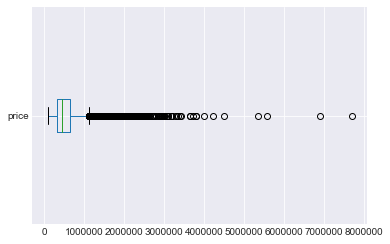

In [20]:
# after some digging, A vast majority of homes have not been viewed, renovated or on the water.
# We can again assume NA's as placeholders, though lets see how the NA waterfront observations compare to observations
# that declared their waterfront status

df.yr_renovated.fillna(0, inplace = True)
df.view.fillna(0, inplace = True)
# oh geez, oh man, I forgot I had to specify inplace to make the changes permanent.

#subsetting the data to sort by waterfront status and visualizing price points.
df_nowater = df[df.waterfront == 0]
df_water = df[df.waterfront == 1]
df_na_water = df[df.waterfront.isna()]


df_nowater.price.plot(kind='box', vert=False)


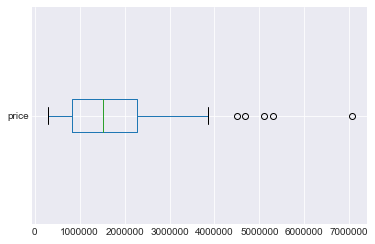

In [21]:
df_water.price.plot(kind='box', vert=False)

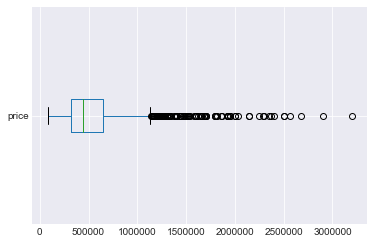

In [22]:
df_na_water.price.plot(kind='box', vert=False)

In [23]:
#after an excruciatingly long time deliberating how to handle the waterfront missing values, we will fill with zeros 
# for the NA values as their price distribution is more similar to houses without a waterfront

df.waterfront.fillna(0, inplace = True)


### 2.4 - Checking for multicollinearity

One of the assumptions of multiple linear regression is no multicollinearity between predictor variables.
The property in question describing high correlation between predictor variables.

This is undesirable because the variables should be independent in so far as manipulating one of the variables should not affect the other target variables for ceteris paribus, or all things being equal, change in 'a' equals change in 'b'.

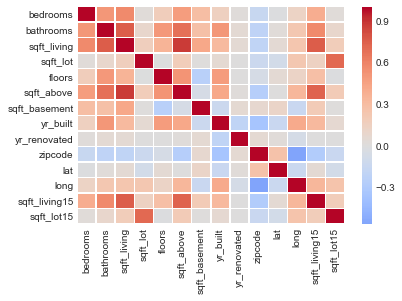

In [24]:
# subset data frame for target and predictor variables

df_predictors = df.iloc[:,3:]
df_target = df.iloc[:,2:3]



# draw the heatmap
sns.heatmap(df_predictors.corr(), center=0, linewidths=.5, cmap = 'coolwarm');

sqft_living seems to be highly correlated with bathrooms, sqft_above and sqft_living15.

Intuitively this seems valid. considering that those 3 columns would have a direct impact on total sqft_living of a house.

We'll drop those colums in the next section.

In [25]:

# Just to be certain of correlation and we're not just relying on color visualization

df_predictors.corr() > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False


### 2.5 - Remove unnecessary columns

We'll be removing id, date, lat, long and zipcode columns as they are not needed.

Dropping yr_renovated as we will be going forward with a new column that better captures what we're looking for

Also removing columns that violated multicollinearity assumption.

In [26]:
# dropping columns
df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'bathrooms', 'sqft_above', 'sqft_living15', 'yr_renovated'], axis=1, inplace=True)

df

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_lot15,renovated
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,0,1955,5650,no
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,400,1951,7639,20th century
2,180000.0,2,770,10000,1.0,0.0,0.0,3,6,0,1933,8062,NaN
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,7,910,1965,5000,no
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,8,0,1987,7503,no
5,1230000.0,4,5420,101930,1.0,0.0,0.0,3,11,1530,2001,101930,no
6,257500.0,3,1715,6819,2.0,0.0,0.0,3,7,0,1995,6819,no
7,291850.0,3,1060,9711,1.0,0.0,0.0,3,7,0,1963,9711,no
8,229500.0,3,1780,7470,1.0,0.0,0.0,3,7,730,1960,8113,no
9,323000.0,3,1890,6560,2.0,0.0,0.0,3,7,0,2003,7570,no


### Step 2 summary

In the data cleaning section we:

Adressed na values and unsuitable datatypes

Tested for multicollinearity

Removed columns that would affect model performance


### 3 EDA (Exploratory data analysis)

3.1 Obtain and visualize important quantitative and categorical information 

3.2 Answer questions and derive insights relating to the new information.

In [27]:
# build a subset of numerical variables for 5 point statistics
numerical_columns = ['price', 'bedrooms', 'sqft_lot', 'floors', 'sqft_basement', 
           'yr_built', 'sqft_living', 'sqft_lot15']

round(df[numerical_columns].describe(), 3)

,price,bedrooms,sqft_lot,floors,sqft_basement,yr_built,sqft_living,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,15099.409,1.494,285.717,1971.000,2080.322,12758.284
std,367368.140,0.926,41412.637,0.540,439.820,29.375,918.106,27274.442
min,78000.000,1.000,520.000,1.000,0.000,1900.000,370.000,651.000
25%,322000.000,3.000,5040.000,1.000,0.000,1951.000,1430.000,5100.000
50%,450000.000,3.000,7618.000,1.500,0.000,1975.000,1910.000,7620.000
75%,645000.000,4.000,10685.000,2.000,550.000,1997.000,2550.000,10083.000
max,7700000.000,33.000,1651359.000,3.500,4820.000,2015.000,13540.000,871200.000


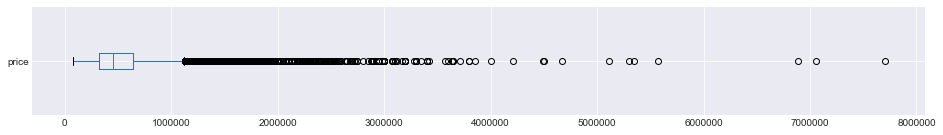

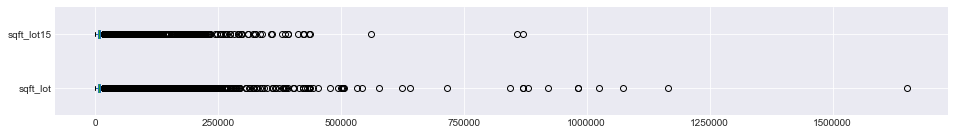

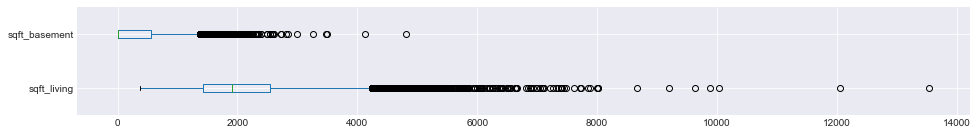

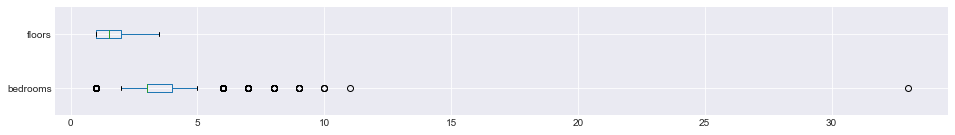

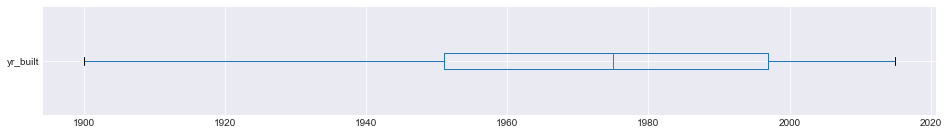

In [28]:
# making box plots to visualize data 
df['price'].plot(kind='box', vert=False, figsize = (16,2))
df[['sqft_lot', 'sqft_lot15']].plot(kind='box', vert=False, figsize = (16,2))
df[['sqft_living', 'sqft_basement']].plot(kind='box', vert=False, figsize = (16,2))
df[['bedrooms', 'floors']].plot(kind='box', vert=False, figsize = (16,2))      
df[['yr_built']].plot(kind='box', vert=False, figsize = (16,2))                                    


### Observations:

price: As indicated by the sea of outliers, the standard deviation is very high, many values way above the mean.
75% of all houses have prices between 78,000 and 645,000.

sqft_living: The IQR is quiet straightforward with severe outliers. Same is true for sqft_basement.

floors are simply ranged around the mean of 1.5. Makes enough sense, most houses would have zoning restrictions preventing too much variance here.

bedrooms: The range is between 1 and 33 rooms with most of the houses having not more than 4 bedrooms. There are some outliers. That 33 bedroom datapoint is an extreme outlier with the next highest being 11.

yr_built: 50% of the houses were built between 1951 and 1997. No outliers present. While new homes will normally fetch a higher price, will we find homes built in a certain time period are worth more than others?

There are severe outliers in most of the variables due and would consider fitting the model a) without removing them and b) after removing them.

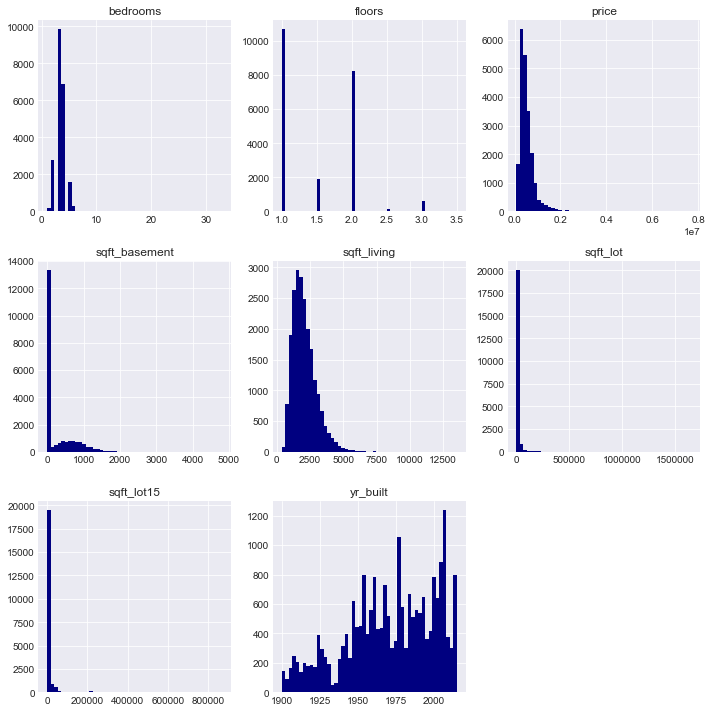

In [29]:
# creating histogram to view value distribution
fig = df[numerical_columns].hist(bins=50, color='navy', figsize=(10,10), grid=True)
plt.tight_layout();

In [30]:
# Oh geez oh man, these values sure aren't normally distributed, another assumption of linear regression violated.
# may have to apply transformations.

# Now for the categorical variables.

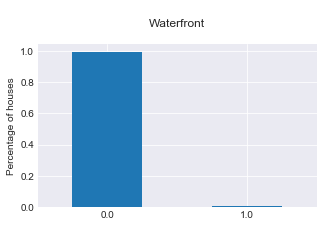

In [31]:
# variable "waterfront"
df.waterfront.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nWaterfront\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

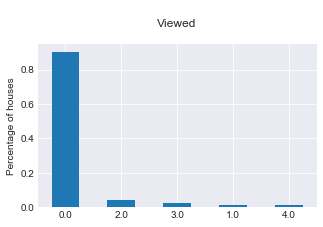

In [32]:
# variable "view"
df.view.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nViewed\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

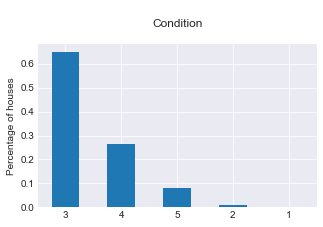

In [33]:
# variable "condition"
df.condition.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nCondition\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

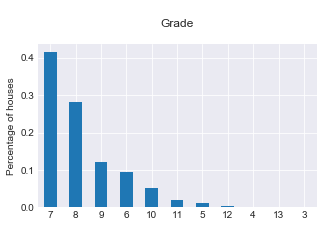

In [34]:
# variable "grade"
df.grade.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nGrade\n", figsize=(5,3))
plt.ylabel('Percentage of houses');

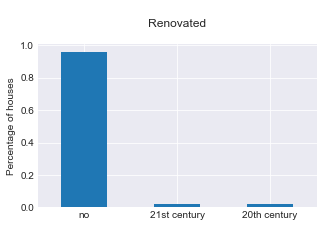

In [35]:
# variable "renovated"
df.renovated.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nRenovated\n", figsize=(5,3))
plt.ylabel('Percentage of houses');


### Observations:

Waterfront: Only 0.68% (146 of 21597) of all houses are located at the water.

Condition: Most houses are in condition 3, 4 or 5. Scale of 1-5

Grades: Around 2/3 of the houses are rated 7 or 8. Unusual scale of 3-13

Renovation Status: 97% (20876 of 21597) of all building never were renovated.

In [36]:
#
df.renovated.value_counts()

no              17020
21st century      365
20th century      356
Name: renovated, dtype: int64

### 3.2 answering questions with data 

#### Do renovations increase the value of a house?


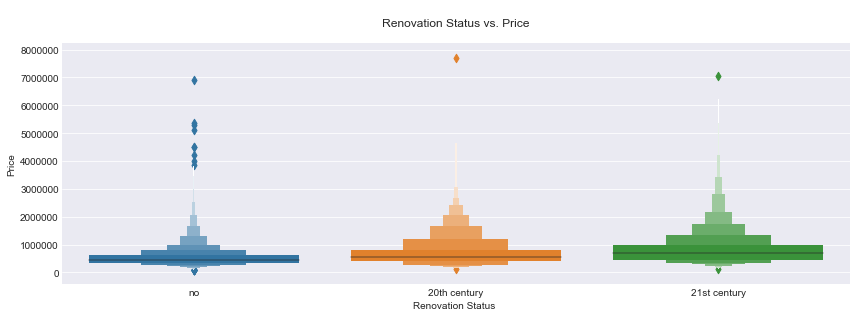

In [37]:
# plotting renovated variable against price to see spread of values
# seaborn's catplot function is an excellent tool for the job
# https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(x="renovated", y="price", data=df, kind = 'boxen', height=4, aspect=3)
plt.title('\nRenovation Status vs. Price\n')
plt.xlabel('Renovation Status ')
plt.ylabel('Price');

It's not entirely clear cut, since so many properties never renovated, but like many facets the recency of the renovation fetches higher prices similar to a recently built house or a newer model product.

Note that renovated houses received a small bump in their price floor

#### How much weight does grade have on price?

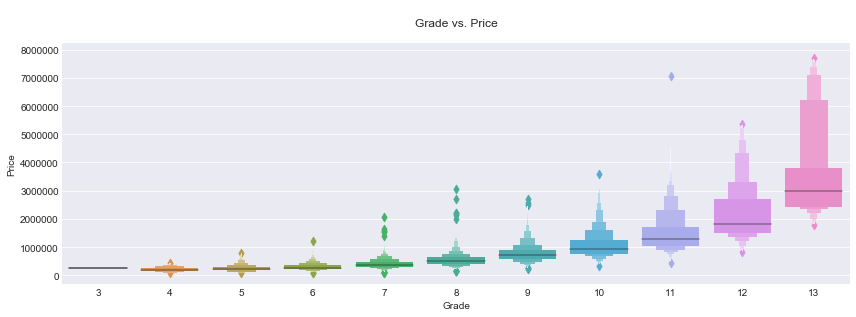

In [38]:
# plotting grade variable against price

sns.catplot(x="grade", y="price", data=df, kind = 'boxen', height=4, aspect=3)
plt.title('\nGrade vs. Price\n')
plt.xlabel('Grade')
plt.ylabel('Price');

Very nice, this variable is very clear cut, looking like an almost exponential rise in price with higher grades. As each progressive grade increase leads to an overall higher price valuation.

#### The grade column seems to have a strong bearing on price, do high grade houses have other traits in common?

In [39]:
df_max_grade = df[df.grade == 13]

df_max_grade

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_lot15,renovated
4407,5570000.0,5,9200,35069,2.0,0.0,0.0,3,13,3000,2001,24345,NaN
4807,2480000.0,5,6810,7500,2.5,0.0,0.0,3,13,700,1922,7500,no
5446,1780000.0,4,4890,13402,2.0,0.0,0.0,3,13,0,2004,13539,no
6035,2390000.0,4,6330,13296,2.0,0.0,2.0,3,13,1430,2000,9196,no
7028,3800000.0,5,7050,42840,1.0,0.0,2.0,4,13,2730,1978,20570,no
7245,7700000.0,6,12050,27600,2.5,0.0,3.0,4,13,3480,1910,8800,20th century
7900,3200000.0,6,7100,18200,2.5,0.0,0.0,3,13,1860,1933,6477,21st century
9245,6890000.0,6,9890,31374,2.0,0.0,4.0,3,13,1030,2001,42730,no
10362,2980000.0,5,7400,18898,2.0,0.0,3.0,3,13,1110,2001,26442,no
13398,2420000.0,5,7880,24250,2.0,0.0,2.0,3,13,0,1996,10761,no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1cc8a668>,
      dtype=object)

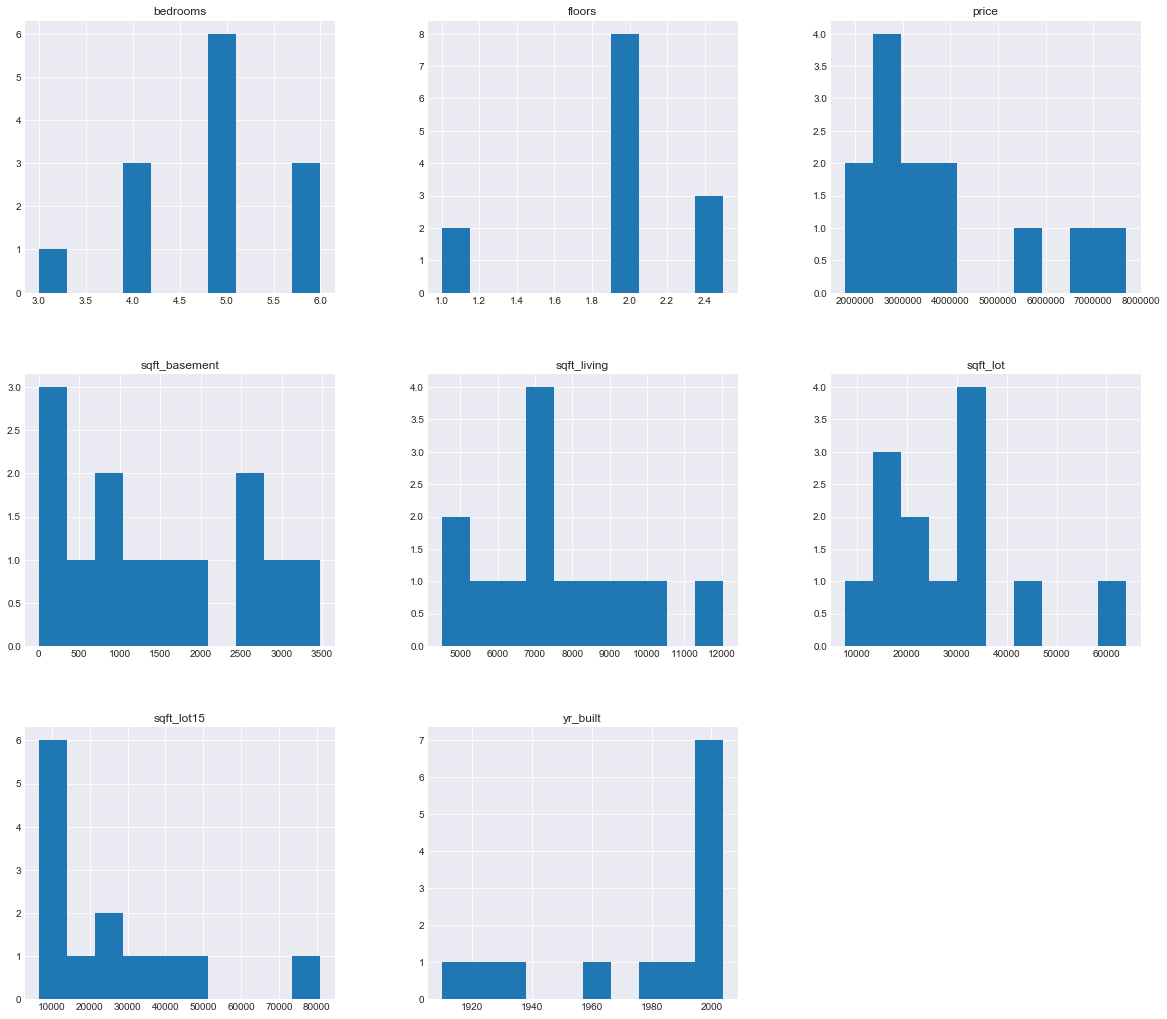

In [40]:
df_max_grade.hist(figsize = (20,18))

How auspicous, there are 13 homes that have the distinction of the highest grade which also happens to be 13. 

All of them are million dollar houses. none are waterfront. mode condition of 3. The grading criterion must be very selective to only admit .06% of all houses. It would be interesting to look into what constitutes this lofty grade.

This exploration piques our interest as to how the next best grade compares.

In [41]:
df_penultimate_grade = df[df.grade == 12]

# how many made the grade and some 5 point stats.
print(df_penultimate_grade.shape)
df_penultimate_grade.describe()

(89, 13)


,price,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,sqft_lot15
count,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2.202528e+06,4.269663,5479.022472,54819.213483,1.949438,831.528090,1992.404494,39134.078652
std,1.028718e+06,0.901565,1536.202867,109671.862228,0.446228,1054.164297,21.107258,59972.008663
min,8.350000e+05,2.000000,3690.000000,3452.000000,1.000000,0.000000,1902.000000,2199.000000
25%,1.500000e+06,4.000000,4460.000000,16481.000000,2.000000,0.000000,1991.000000,14571.000000
50%,1.820000e+06,4.000000,5000.000000,25714.000000,2.000000,290.000000,1998.000000,19602.000000
75%,2.700000e+06,5.000000,6380.000000,40097.000000,2.000000,1390.000000,2003.000000,35326.000000
max,5.350000e+06,8.000000,13540.000000,920423.000000,3.500000,4820.000000,2010.000000,411962.000000


Again most of these homes are able to reach million dollar values.






#### When were most of the waterfront properties built? We have a strong hunch that waterfront properties were built earlier, akin to how major cities first developed near the coastline. 

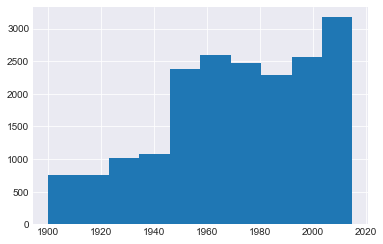

In [42]:
#reusing old subset from earlier section to see year distribution
df_nowater.yr_built.hist()

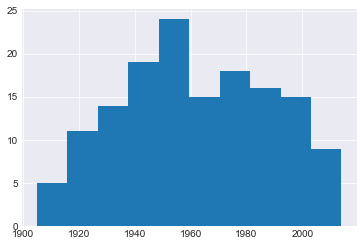

In [43]:
#reusing old subset from earlier section to see year distribution
df_water.yr_built.hist()

Ok, this trend shows that as a finite and coveted feature, development on houses near desirable attributes occured first, and tapered off as there was less land supply available. Contrasted with the available non waterfront land which jumped up in the 1950's.


### 4 - Modeling the data

4.1 - Assumptions of OLS Linear Regression (Normality, Linearity, 
Multicollinearity of Independent Variables) 

4.2 - One-hot encoding of categorical data 

4.3 - Fitting the Model 

4.4 - Train/Test-Split 

4.5 - Cross Validation 

4.6 - Assumption of OLS Linear Regression (Normality & Homoscedasticity of Residuals)

### 4.1 - Assumptions of OLS Linear Regression



(Normality assumption)

OLS is a method of linear regression, its purpose is to make a best-fit line with the data by minimizing the sum of squared errors from the data.(the difference between observed values and predicted values)

OLS does not require variables to follow a normal distribution to produce unbiased estimates. Though if you fulfill this assumption, you can perform hypothesis testing and establish reliable confidence and prediction intervals.

OLS' predictive efficacy remains consistent whether or not the data is normally distributed.






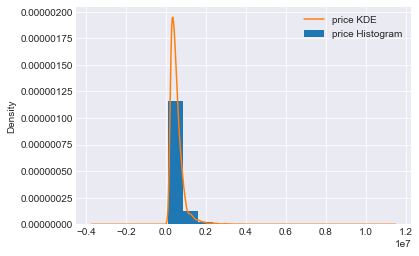

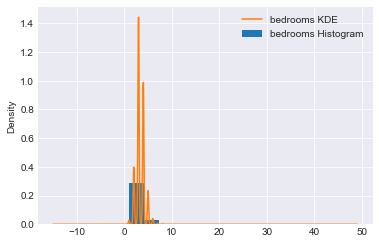

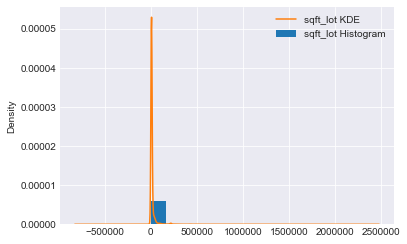

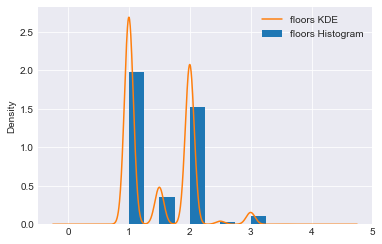

TypeError: Empty 'DataFrame': no numeric data to plot

In [45]:
for column in ['price', 'bedrooms', 'sqft_lot', 'floors', 'view', 'sqft_basement', 'yr_built', 
               'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(density=True, label=column + ' Histogram')
    df[column].plot.kde(label=column + ' KDE')
    plt.legend()
    plt.show()

In [73]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'sqft_lot15',
       'renovated'],
      dtype='object')

In [74]:
df.view.describe()

count     21597.0
unique        5.0
top           0.0
freq      19485.0
Name: view, dtype: float64

(Linearity assumption) 
There should be a linear relationship between the response variable (Y) and predictor (X). meaning that the change in Y by 1-unit change in X, is constant. Scatterplots can reveal linearity or lack thereof between the variables by juxtaposing a trend line through the data points.

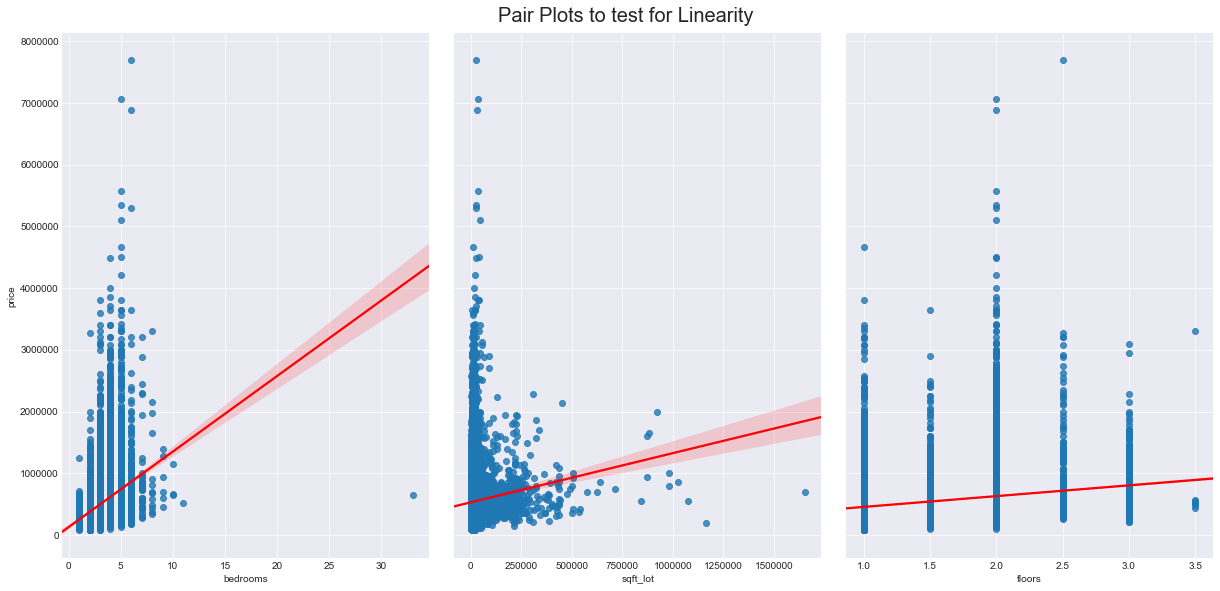

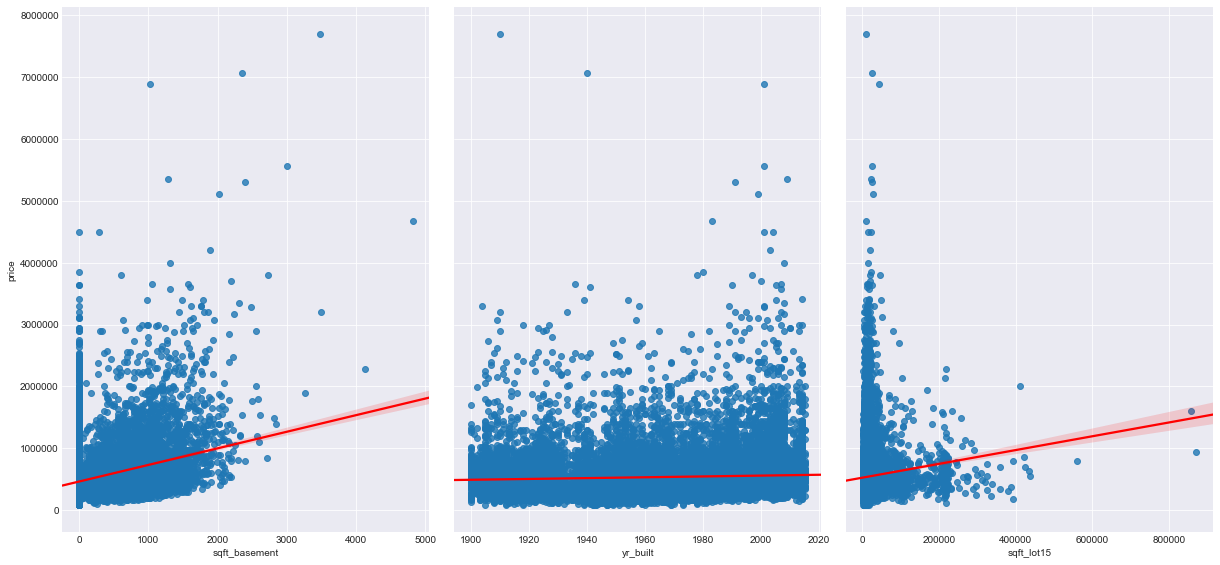

In [83]:
# visualize the pairwise relationship between the features and the response using pairplots (seaborn scatterplots)

sns.pairplot(x_vars=['bedrooms', 'sqft_lot', 'floors'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'red'}}, height=8, aspect=0.7)

plt.suptitle('Pair Plots to test for Linearity', size=20, y=1.02)

sns.pairplot(x_vars=['sqft_basement', 'yr_built', 'sqft_lot15'], 
             y_vars='price', data=df, 
             kind='reg', plot_kws={'line_kws':{'color':'red'}}, height=8, aspect=0.7)
plt.show();

Observations:

The predictor variables exhibit slight positive relationship with the target except yr_built where the trendline is flat, suggesting no relationship with price.

As we can see a line is a good fit for the data, suggesting linearity compared to a nonlinear function like a parabola.


Now we'll assess how strongly each independent variable correlates with price using a correlation matrix and focus on a few promising variables, which seem most correlated with the price.



In [85]:
# plot correlation matrix
corr_matrix = df.corr()

# sort by target variable
corr_matrix['price'].sort_values(ascending=False)


# pd.DataFrame for stylistic preference, optional step
pd.DataFrame(corr_matrix['price'].sort_values(ascending=False))

,price
price,1.000000
sqft_living,0.701917
sqft_basement,0.321108
bedrooms,0.308787
floors,0.256804
sqft_lot,0.089876
sqft_lot15,0.082845
yr_built,0.053953



This step helped us appraise which variables we want to focus on for further analysis by ascertaining how much of an impact they have on price. A lot of the relevant variables have some association to home size. So much more so than the size of the lot. This dynamic is unusual to me because where I am located, (Honolulu) the land is often worth more than the house itself.




(multicollinearity assumption)
This was addressed during the scrubbing section of the project, our findings resulting in dropping intercorrelated variables.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
view             21597 non-null category
condition        21597 non-null category
grade            21597 non-null category
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
sqft_lot15       21597 non-null int64
renovated        17741 non-null category
dtypes: category(5), float64(2), int64(6)
memory usage: 1.4 MB


### 4.2 One hot encoding of categorical data

Before we build the model, we need to create dummy variables for our categorical variables. One-hot encoding is required when adding categorical variables in a regression model!

copy paste

In [49]:
# create dummy variables using get_dummies, then exclude one column
# (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

waterfront_dummies = pd.get_dummies(df.waterfront, prefix='waterfront').iloc[:,0:-1]
condition_dummies = pd.get_dummies(df.condition, prefix='condition').iloc[:,1:]
grade_dummies = pd.get_dummies(df.grade, prefix='grade').iloc[:,1:]
renovated_dummies = pd.get_dummies(df.renovated, prefix='renovated').iloc[:,1:]
view_dummies = pd.get_dummies(df.view, prefix='view').iloc[:,1:]

In [50]:
# concatenate the dummy variable columns onto the original dataframe
data = pd.concat([df, waterfront_dummies, condition_dummies, grade_dummies, 
                  renovated_dummies, view_dummies], axis=1)
data.head(2)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,grade_10,grade_11,grade_12,grade_13,renovated_20th century,renovated_21st century,view_1.0,view_2.0,view_3.0,view_4.0
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,7,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,7,400,...,0,0,0,0,1,0,0,0,0,0


In [51]:
data.columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 34 columns):
price                     21597 non-null float64
bedrooms                  21597 non-null int64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
waterfront                21597 non-null category
view                      21597 non-null category
condition                 21597 non-null category
grade                     21597 non-null category
sqft_basement             21597 non-null int64
yr_built                  21597 non-null int64
sqft_lot15                21597 non-null int64
renovated                 17741 non-null category
waterfront_0.0            21597 non-null uint8
condition_2               21597 non-null uint8
condition_3               21597 non-null uint8
condition_4               21597 non-null uint8
condition_5               21597 non-null uint8
grade_4                   

### 4.3 - Fitting the model

#### Simple linear regression(s) to select features¶


In [52]:
# loading scikit learn
from sklearn.linear_model import LinearRegression


In [53]:
# create X and y
feature_cols = [ 'bedrooms', 'floors', 'sqft_living', 'sqft_lot',
                'sqft_basement', 'yr_built', 'sqft_lot15',
                'waterfront_0.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'renovated_20th century', 'renovated_21st century',
       'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0']
X = data[feature_cols]
y = data.price

# fit the model
lm = LinearRegression()
lm.fit(X, y)

# print intercept
print("Estimated intercept:", lm.intercept_)

Estimated intercept: 5964680.226416422


In [54]:
# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

,Features,Estimated Coefficient
0,bedrooms,-2.007564e+04
1,floors,5.327446e+04
2,sqft_living,1.470315e+02
3,sqft_lot,-9.366524e-03
4,sqft_basement,3.352113e+01
5,yr_built,-2.801329e+03
6,sqft_lot15,-5.191452e-01
7,waterfront_0.0,-5.319241e+05
8,condition_2,1.305662e+04
9,condition_3,3.809225e+04


estimated coefficient suggests on average, for a one unit increase in x there is an increase in y of estimated coefficient value

In [55]:
# print R²
print("Estimated R squared:")
print(lm.score(X,y))

Estimated R squared:
0.6807358019983625


In [56]:
#try the same procedure with statsmodels
import statsmodels.api as sm

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/Users/brycenwong/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1642.
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        02:29:11   Log-Likelihood:            -2.9506e+05
No. Observations:               21597   AIC:                         5.902e+05
Df Residuals:                   21568   BIC:                         5.904e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.965e+06   2.46e+05     24.234      0.000    5.48e+06    6.45e+06
bedrooms               -2.008e+04   1966.841    -10.207      0.000   -2.39e+04   -1.62e+04
floors                  5.327e+04   3517.521     15.145      0.000    4.64e+04    6.02e+04
sqft_living              147.0315      3.350     43.893      0.000     140.466     153.597
sqft_lot                  -0.0094      0.049     -0.190      0.849      -0.106       0.087
sqft_basement             33.5211      4.298      7.799      0.000      25.097      41.946
yr_built               -2801.3294     65.237    -42.941      0.000   -2929.198   -2673.461
sqft_lot15                -0.5191      0.075     -6.902      0.000      -0.667      -0.372
waterfront_0.0         -5.319e+05   2.11e+04    -25.231      0.000   -5.73e+05   -4.91e+05
condition_2             1.306e+04   4.19e+04      0.312      0.755    -6.9e+04    9.51e+04
condition_3             3.809e+04   3.89e+04      0.978      0.328   -3.82e+04    1.14e+05
condition_4             5.843e+04    3.9e+04      1.500      0.134   -1.79e+04    1.35e+05
condition_5             1.046e+05   3.92e+04      2.671      0.008    2.78e+04    1.81e+05
grade_4                 3.509e+04   2.12e+05      0.166      0.868    -3.8e+05     4.5e+05
grade_5                 2.255e+04   2.08e+05      0.108      0.914   -3.86e+05    4.31e+05
grade_6                 7.147e+04   2.08e+05      0.344      0.731   -3.36e+05    4.79e+05
grade_7                 1.572e+05   2.08e+05      0.757      0.449    -2.5e+05    5.65e+05
grade_8                 2.503e+05   2.08e+05      1.204      0.229   -1.57e+05    6.58e+05
grade_9                 3.936e+05   2.08e+05      1.893      0.058    -1.4e+04    8.01e+05
grade_10                5.805e+05   2.08e+05      2.791      0.005    1.73e+05    9.88e+05
grade_11                8.577e+05   2.08e+05      4.118      0.000    4.49e+05    1.27e+06
grade_12                1.333e+06   2.09e+05      6.366      0.000    9.22e+05    1.74e+06
grade_13                2.535e+06   2.16e+05     11.712      0.000    2.11e+06    2.96e+06
renovated_20th century  -756.5712   1.14e+04     -0.066      0.947   -2.31e+04    2.16e+04
renovated_21st century  1.196e+05   1.13e+04     10.584      0.000    9.74e+04    1.42e+05
view_1.0                1.204e+05   1.17e+04     10.335      0.000    9.76e+04    1.43e+05
view_2.0                5.639e+04   7058.529      7.989      0.000    4.26e+04    7.02e+04
view_3.0                1.126e+05   9657.036     11.664      0.000    9.37e+04    1.32e+05
view_4.0                2.524e+05   1.47e+04     17.215      0.000    2.24e+05    2.81e+05
==============================================================================
Omnibus:                    12377.163   Durbin-Watson:                   1.974
Prob(Omnibus)



The regression results confirm our variables as statistically significant as their p-values are less than .05.
This validates our earlier process addressing multicollinearity.
Most of the feature coefficents are positively correlated with price as an increase in the feature is of value and reflected in the price. Some features are negatively correlated and it's still intuitive, undesireable features like a low grade or older construction date are seen as detractors.

The R squared value/coefficient of determination represents the percentage

### 4.4 - Train-test split

In [57]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
# defining feature and target variables again
feature_cols = ['bedrooms', 'floors', 'sqft_living', 'sqft_lot',
                'sqft_basement', 'yr_built', 'sqft_lot15',
                'waterfront_0.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'renovated_20th century', 'renovated_21st century',
       'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0']
X = data[feature_cols]
y = data.price

In [59]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17277, 28) (4320, 28) (17277,) (4320,)


In [60]:
# instantiate model again and fit model to the training data (learn the coefficients)
model = LinearRegression()
model.fit(X_train, y_train)

# print R²
print("Estimated R²:")
print(lm.score(X,y))

# pair the feature names with the coefficients into a dataframe
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient'])

Estimated R²:
0.6807358019983625


,Features,Estimated Coefficient
0,bedrooms,-2.007564e+04
1,floors,5.327446e+04
2,sqft_living,1.470315e+02
3,sqft_lot,-9.366524e-03
4,sqft_basement,3.352113e+01
5,yr_built,-2.801329e+03
6,sqft_lot15,-5.191452e-01
7,waterfront_0.0,-5.319241e+05
8,condition_2,1.305662e+04
9,condition_3,3.809225e+04


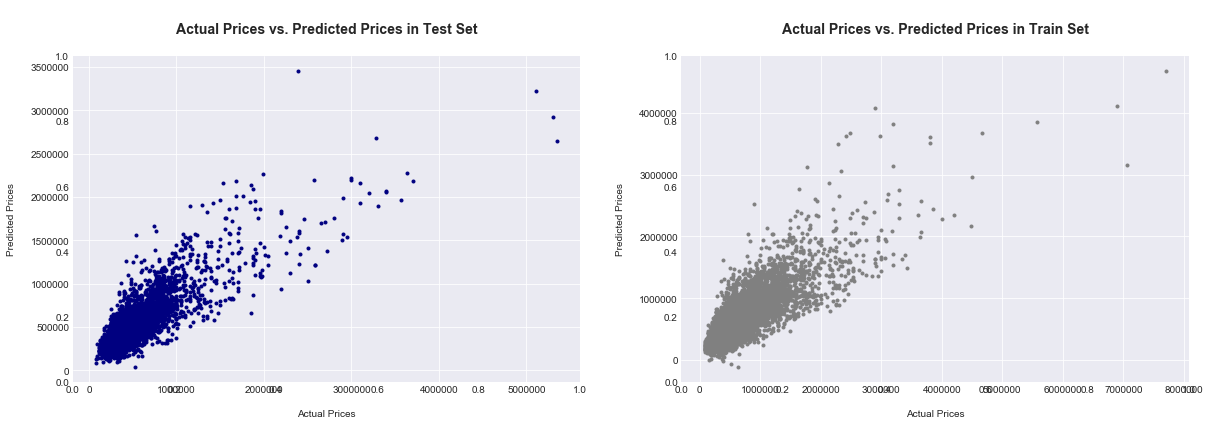

In [61]:
# apply the model to predict prices for test data
y_pred_test = lm.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(20, 6))

# visualize the differences between actual values and predicted values in TEST data
ax1 = fig.add_subplot(121)
ax1.scatter(y_test, y_pred_test, marker='.', c='navy')
ax1.set_xlabel("\nActual Prices")
ax1.set_ylabel("Predicted Prices\n")
ax1.set_title("\nActual Prices vs. Predicted Prices in Test Set\n", size=14, weight='bold')

# apply the model to predict prices for test data
y_pred_train = lm.predict(X_train)

# visualize the differences between actual values and predicted values in TRAIN data
ax2 = fig.add_subplot(122)
ax2.scatter(y_train, y_pred_train, marker='.', c='grey')
ax2.set_xlabel("\nActual Prices")
ax2.set_ylabel("Predicted Prices\n")
ax2.set_title("\nActual Prices vs. Predicted Prices in Train Set\n", size=14, weight='bold');

ideally, the scatter plot should create a linear line. Since the model does not fit 100% - and honestly not even close to 100% -, the scatter plot can't create a linear line. To check the level of error of a model, we calculate the residuals and the error measures:

In [62]:
# calculate residuals by hand
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test  - y_test


RMSE indicates the absolute fit of the model to the data – how close the observed data points are to the model’s predicted values. Whereas R² is a relative measure of fit, RMSE is an absolute measure of fit. Lower RMSE indicate better fit. important criterion for model fit

In [63]:

# calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE Train Set:", mse_train) 
print("MSE Test Set :", mse_test)

# calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("\nRMSE Train Set:", rmse_train)
print("RMSE Test Set:", rmse_test)

# calculate standard deviation of response variable
print("\nStD Target:", df.price.std())

MSE Train Set: 42304962364.564545
MSE Test Set : 46208076759.744736

RMSE Train Set: 205681.70157932024
RMSE Test Set: 214960.6400245048

StD Target: 367368.1401013936


### 4.5 Cross validation

Cross validation is a fail-safe measure in the event that the train/test split does not generalize well to new data, also known as overfitting. this step is the assurance or validation that the model will effectively interpret new data without underfitting or overfitting issues.

Between train-test split and cross validation. As always the response to which to use: it depends.

generally Cross validation is more time intensive and reliable. It may not be practical to always use cross validation for larger datasets or when under time constraints.

In [64]:
# import libraries
from sklearn.model_selection import cross_val_score

In [65]:
# perform 5-fold cross validation with the final model and printing R^2
scores1 = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:")
print(scores1)

Cross-validated R² scores:
[0.67460776 0.69058701 0.6733984  0.66151572 0.66573202]


In [66]:
# printing MSE's
scores2 = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated neg. MSE's:")
print(scores2)

Cross-validated neg. MSE's:
[-4.93283794e+10 -4.34413447e+10 -3.82168964e+10 -4.30291011e+10
 -4.59816432e+10]


### 4.6 - Assumptions of OLS Linear Regression

We're going to check for normal distribution and homoscedasticity

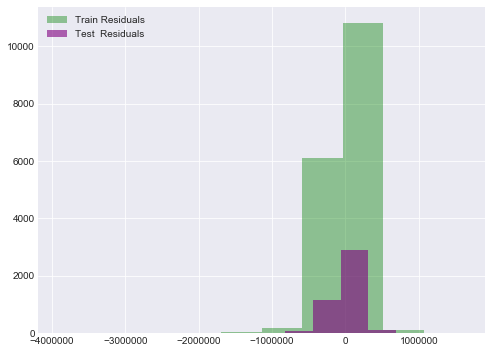

In [69]:
# plotting train and test residuals to check their distribution
plt.figure(figsize=(8,6))
plt.hist(train_residuals, color= 'green', label='Train Residuals', alpha=0.4)
plt.hist(test_residuals, color='purple', label='Test  Residuals', alpha=0.6)
plt.legend(loc=2)
plt.show();

 Homoscedasticity of Residuals
This assumption requires the error term to be consistent for all observations. Homoscedasticity describes a situation in which the variance of the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) does not change for each observation or for a range of observations.

Heteroscedasticity (the violation of homoscedasticity) is present when the size of the error term differs across values of an independent variable.

The easiest way to check this assumption is to create a residuals versus fitted value scatter plot. Heteroscedasticity would appear as a cone shape where the spread of the residuals increases in one direction.

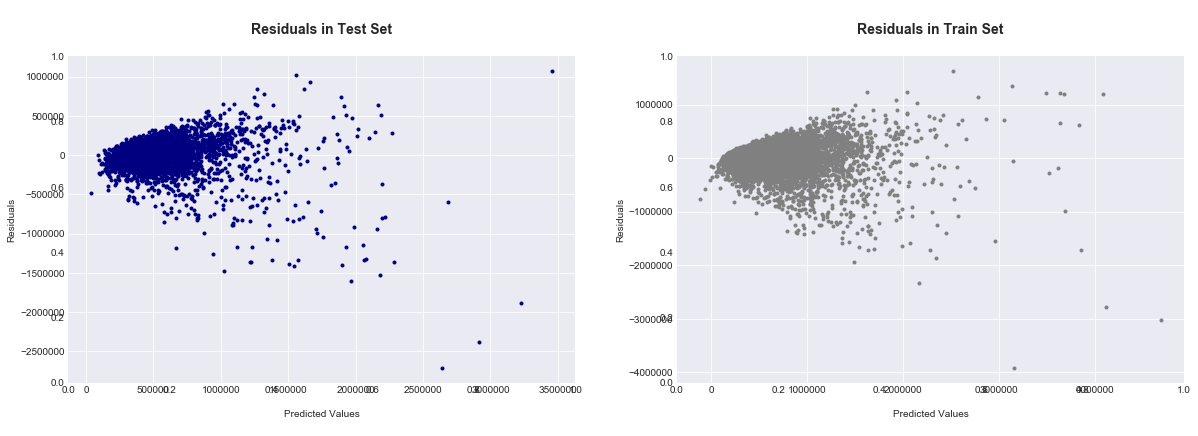

In [70]:
# plotting residuals in a scatterplot to check their variance
fig, ax = plt.subplots(1,2, figsize=(20, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(x=y_pred_test, y=test_residuals, c='navy', marker='.')
ax1.set_title('\nResiduals in Test Set\n', size=14, weight='bold')
ax1.set_xlabel('\nPredicted Values\n')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(122)
ax2.scatter(x=y_pred_train, y=train_residuals, c='grey', marker='.')
ax2.set_title('\nResiduals in Train Set\n', size=14, weight='bold')
ax2.set_xlabel('\nPredicted Values\n')
ax2.set_ylabel('Residuals');


Interpretation:

The scatterplots of the train and test residuals exhibit heteroscedasticity.
This is inferred from the visual cone shape of values as opposed to an even spread.
When heteroscedasticity is present, residuals with larger variance have more “pull” than other observations. 

## 5 - Interpreting the data

### 5.1 - Quality of final model
The purpose of building regression models is to make predictions. Able to generalize well to new data.

Bias Measures

All features were statistically significant, producing satisfactory p-values less than .05.

Precision Measures

R-squared indicates percentage variance in target variable explained by feature variables.

This statistic measures the magnitude of the association from 0-100%.

The R-squared for the model is around 68%. That is to say the model explains 68% of the change in target(price) as a change in features. Our model cannot explain the other 32% and is considered stochastic error. 

It would be nice to have a higher R-squared value like 75%+. We've done the best practices to improve our model performance as much as we could.

### 5.2 - Explanatory power of model



The coefficients describe the relationship between the independent variables and the dependent variable in magnitude and direction.

One can see that categorical variables are most important:

The features with the strongest coefficients are categorical like grade.

Grade being assigned by the King County grading system. Houses with grades 13 and 12 were far more expensive than their counterparts.

The same can be said of waterfront and recently renovated houses.


From the numerical variables:

Floors, Rooms and visits(view) contributed the most towards higher valuations.

All the findings are intuitive, all features signal quality and high demand and it reflects in the price.

While qualities like waterfront are immutable, further investigation into the grade assignment would be most relevant to a higher valuation where I would prioritze the features of the grading assignment over renovation.

In [72]:
# pair the feature names with the (sorted) coefficients calculated in the final model
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns=['Features', 'Estimated Coefficient']).sort_values(
    by='Estimated Coefficient', ascending=False)

,Features,Estimated Coefficient
21,grade_13,2.534603e+06
20,grade_12,1.332834e+06
19,grade_11,8.577168e+05
18,grade_10,5.805236e+05
17,grade_9,3.935623e+05
27,view_4.0,2.523777e+05
16,grade_8,2.503124e+05
15,grade_7,1.572399e+05
24,view_1.0,1.204265e+05
23,renovated_21st century,1.195536e+05
